**Importing Packages**

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings as wns
import yfinance as yfc
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pandas_datareader import data as wb
from scipy.stats.distributions import chi2
from datetime import datetime

In [3]:
sns.set()

**Treating Data**

In [4]:
raw_data = yfc.download(tickers = '^FTSE',interval = '1d', start = '1994-07-01', end = '2018-11-29', auto_adjust = True)

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^FTSE: No data found for this date range, symbol may be delisted


In [5]:
raw_csv_data = pd.read_csv('../Intro/IndexE8.csv')
df_complete = raw_csv_data.copy()

df_complete['market_value'] = df_complete.ftse

# Transform Date column to the type Date
df_complete.date = pd.to_datetime(df_complete.date, dayfirst = True)

# Setting Date as Index
df_complete.date = df_complete.set_index('date', inplace = True)

# Setting Frequency as Business Day
df_complete = df_complete.asfreq('b')

# Fill empty values -> Front Fill
df_complete = df_complete.fillna(method = 'ffill')

del df_complete['dax']
del df_complete['ftse']
del df_complete['nikkei']
del df_complete['spx']

# Getting 80% of the Data Set
size = int(len(df_complete) * 0.8)

# Setting Train and Test
df, df_test = df_complete.iloc[:size], df_complete.iloc[size:]

**The ACF**

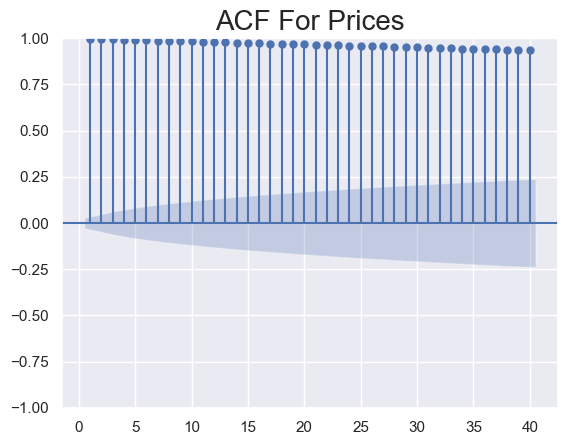

In [6]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF For Prices", size = 20)
plt.show()

**The PACF**

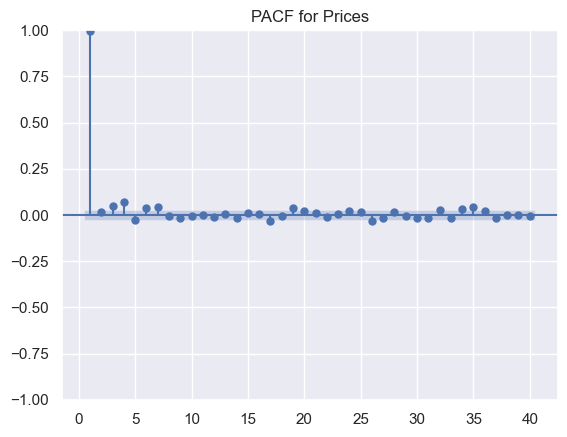

In [7]:
sgt.plot_pacf(df.market_value, zero = False, alpha = 0.05, lags = 40, method = ('ols'))
plt.title('PACF for Prices')
plt.show()

**The AR Model**

In [8]:
model_ar = ARIMA(df.market_value, order = (1, 0, 0))

In [9]:
ar_results = model_ar.fit()
ar_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Thu, 01 Dec 2022   AIC                          55251.207
Time:                        12:49:00   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.329     12.023      0.000    4259.929    5919.346
ar.L1          0.9984      0.001   1147.578      0.000       0.997       1.000
sigma2      3511.3842     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Higher-Lag AR Models**

In [10]:
model_har = ARIMA(df.market_value, order = (2, 0, 0))
results_har = model_har.fit()
results_har.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Thu, 01 Dec 2022   AIC                          55251.898
Time:                        12:49:02   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model_har2 = ARIMA(df.market_value, order = (3, 0, 0))
results_har2 = model_har2.fit()
results_har2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Thu, 01 Dec 2022   AIC                          55241.925
Time:                        12:52:38   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
model_har3 = ARIMA(df.market_value, order = (4, 0, 0))
results_har3 = model_har3.fit()
results_har3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Thu, 01 Dec 2022   AIC                          55217.359
Time:                        12:56:53   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.416    5857.866
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**LLR Test** -> Determ  whether the two models are significally different

In [13]:
def LLR_Test (mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf

    LR = (2 * (L2 - L1))
    p = chi2.sf(LR, DF).round(3)

    return p

In [14]:
LLR_Test(model_har, model_har2)

0.001

In [24]:
LLR_Test(model_har2, model_har3)

0.0

In [27]:
model_har4 = ARIMA(df.market_value, order = (5, 0, 0))
results_har4 = model_har4.fit()
model_har5 = ARIMA(df.market_value, order = (6, 0, 0))
results_har5 = model_har5.fit()
model_har6 = ARIMA(df.market_value, order = (7, 0, 0))
results_har6 = model_har6.fit()
model_har7 = ARIMA(df.market_value, order = (8, 0, 0))
results_har7 = model_har7.fit()
model_har8 = ARIMA(df.market_value, order = (9, 0, 0))
results_har8 = model_har8.fit()

In [41]:
models = [model_har4, model_har5, model_har6, model_har7, model_har8]
for i in models:
    print('______________________________________________________________________________')
    print(i.fit().summary())
    idx = models.index(i) - 1
    if idx == -1:
        print("LLR Test: " + str(LLR_Test(model_har3, i)))
    else:
        print("LLR Test: " + str(LLR_Test(models[idx], i)))

______________________________________________________________________________
                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27600.460
Date:                Fri, 02 Dec 2022   AIC                          55214.920
Time:                        10:50:18   BIC                          55260.570
Sample:                    01-07-1994   HQIC                         55230.916
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    386.229     13.178      0.000    4332.646    5846.635
ar.L1          0.9788      0.010     97.867      0.0